In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [14]:
df=pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
df.shape


(12330, 18)

Data Preprocess

In [16]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [17]:
df1 = df.drop(['OperatingSystems', 'Region', 'TrafficType','Weekend','Browser','Revenue','Month','VisitorType'], axis = 1)

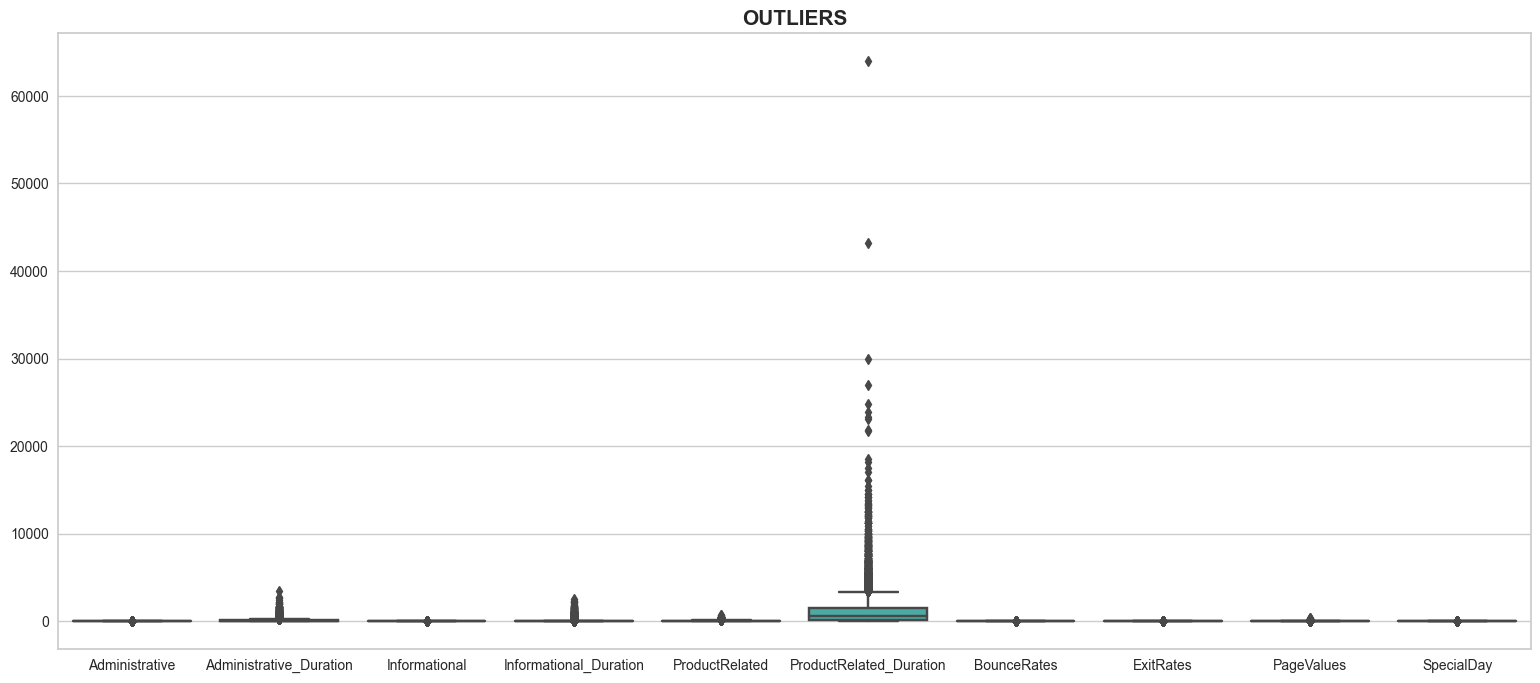

In [18]:
plt.subplots(figsize = (19,8))
sns.boxplot(data = df1)
plt.title('OUTLIERS',fontsize=15,fontweight='bold')
plt.show()

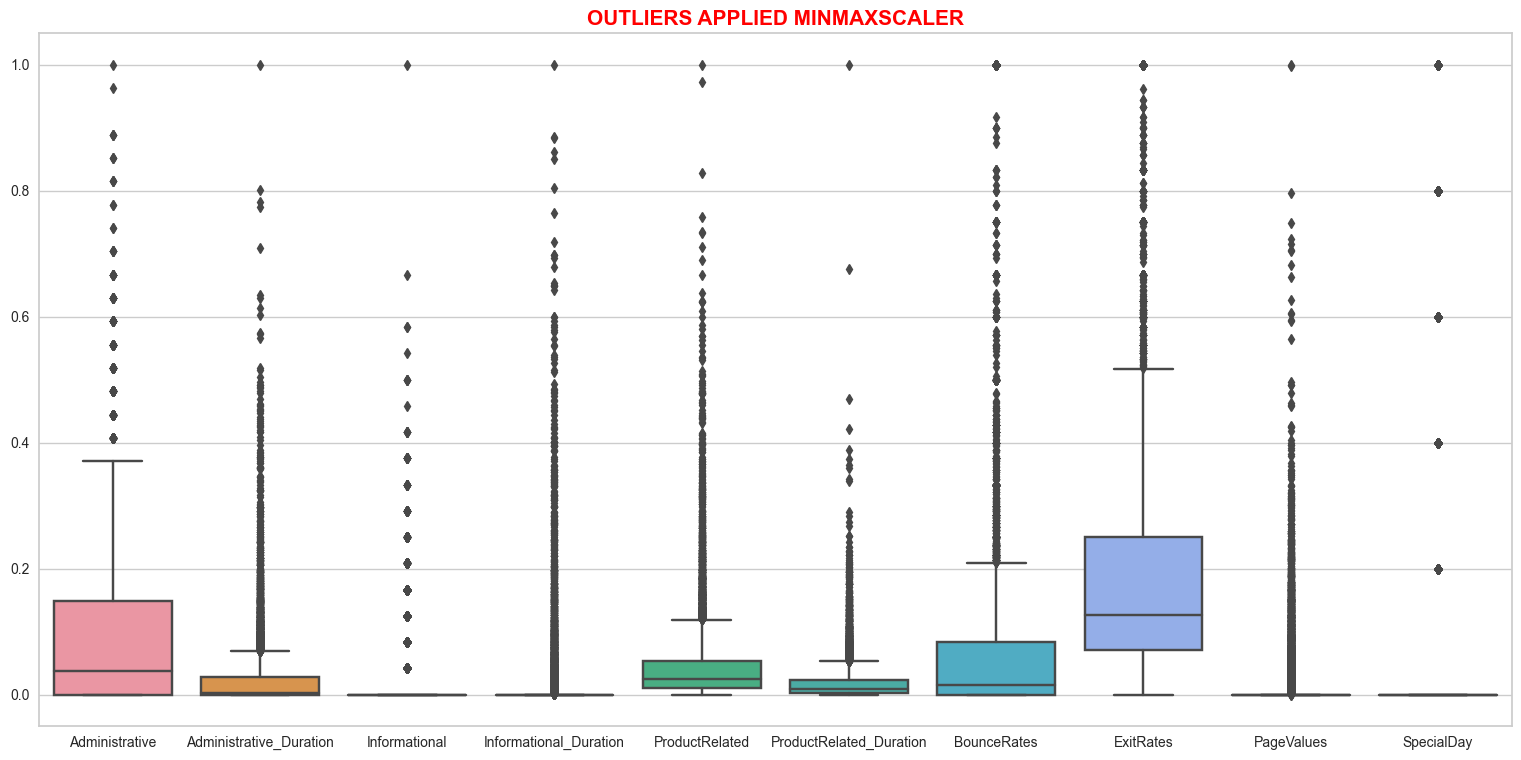

In [19]:
scaler = MinMaxScaler()
sa = scaler.fit_transform(df1)
sd = pd.DataFrame(sa,columns=df1.columns)
plt.subplots(figsize = (19,9))
sns.boxplot(data = sd)
plt.title('OUTLIERS APPLIED MINMAXSCALER',fontsize=15,color = 'red',fontweight='bold')
plt.show()

In [20]:
column = df1.columns
q1_list = []
q3_list = []
medianlist = []
for i in column:
  i1 = df1[i].quantile(.25)
  i3 = df1[i].quantile(.75)
  i2 = df1[i].quantile(.5)
  q1_list.append(i1)
  q3_list.append(i3)
  medianlist.append(i2)
q3_list[4] = 38 
upper_bound = [(x+(x-y)*1.5) for x,y in zip(q3_list,q1_list)]

In [21]:
df1['Administrative'] = np.where(df1['Administrative']>upper_bound[0],medianlist[0],df1['Administrative'])
df1['Administrative_Duration'] = np.where(df1['Administrative_Duration']>upper_bound[1],medianlist[1],df1['Administrative_Duration'])
df1['Informational'] = np.where(df1['Informational']>upper_bound[2],medianlist[2],df1['Informational'])
df1['Informational_Duration'] = np.where(df1['Informational_Duration']>upper_bound[3],medianlist[3],df1['Informational_Duration'])
df1['ProductRelated'] = np.where(df1['ProductRelated']>upper_bound[4],medianlist[4],df1['ProductRelated'])
df1['ProductRelated_Duration'] = np.where(df1['ProductRelated_Duration']>upper_bound[5],medianlist[5],df1['ProductRelated_Duration'])
df1['BounceRates'] = np.where(df1['BounceRates']>upper_bound[6],medianlist[6],df1['BounceRates'])
df1['ExitRates'] = np.where(df1['ExitRates']>upper_bound[7],medianlist[7],df1['ExitRates'])
df1['PageValues'] = np.where(df1['PageValues']>upper_bound[8],medianlist[8],df1['PageValues'])
df1['SpecialDay'] = np.where(df1['SpecialDay']>upper_bound[9],medianlist[9],df1['SpecialDay'])


In [22]:
df2 = df1
df2['Revenue'] = df['Revenue']


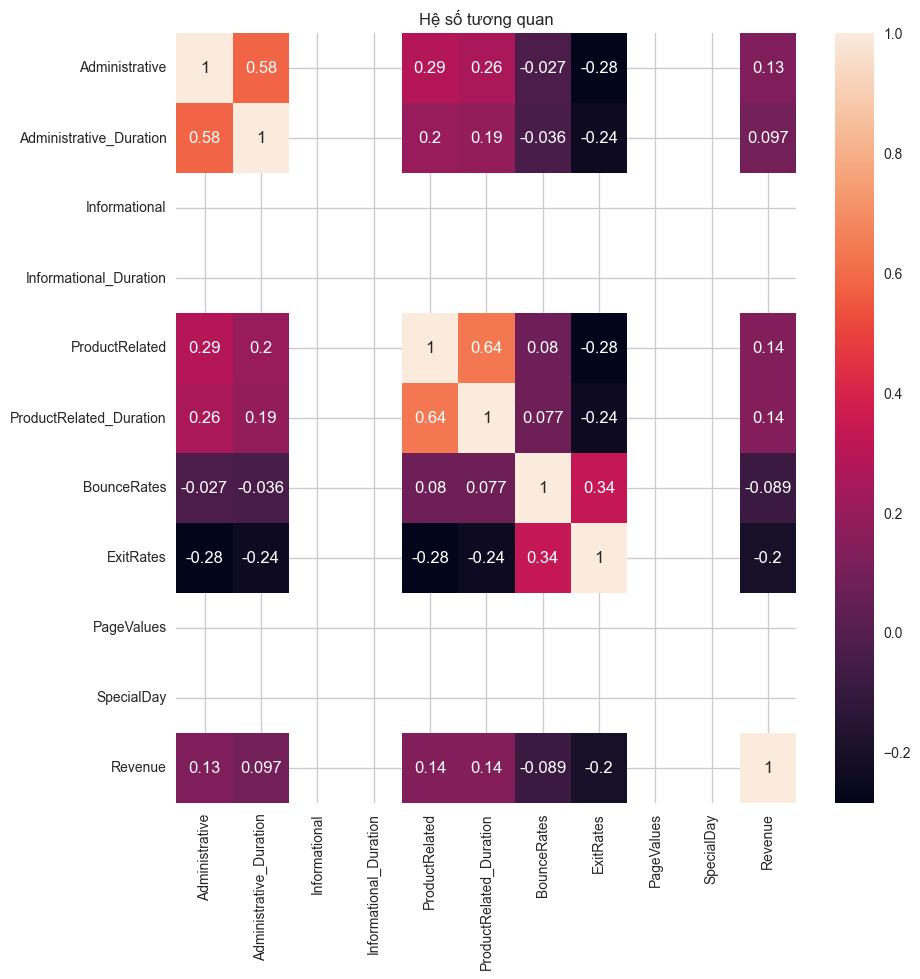

In [23]:
Pea_corr = df2.corr()
fig = plt.figure(figsize = ([10,10]))
plt.title('Hệ số tương quan')
sns.heatmap(Pea_corr,annot = True)
plt.show()


In [24]:
data_shoppers = df1.drop(columns=['Informational','Informational_Duration','PageValues','SpecialDay'])


In [25]:
data_shoppers.to_csv('online_shoppers_intention_process.csv',index=False)


Cluster Analysis

In [26]:
data_3 = data_shoppers
data_3.head(2)


,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Revenue
0,0.0,0.0,1.0,0.0,0.003112,0.025156,False
1,0.0,0.0,2.0,64.0,0.000000,0.100000,False


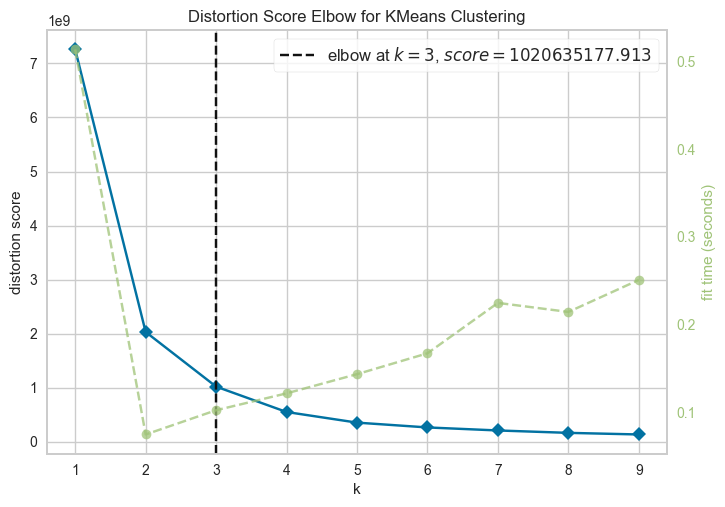

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
Elbow_M = KElbowVisualizer(KMeans(), k=(1,10))
Elbow_M.fit(data_3)
Elbow_M.show()


In [28]:
k = 3
model_kMeans = KMeans(n_clusters = k)
y_means = model_kMeans.fit(data_3)

labels     = model_kMeans.labels_
clustering_1 = pd.concat([data_3, pd.Series(labels, name = 'cluster')], axis = 1)
print(clustering_1.cluster.value_counts(), '\n')

centroids  = model_kMeans.cluster_centers_
print(centroids)


cluster
0    7903
2    2986
1    1441
Name: count, dtype: int64 

[[1.53104059e+00 2.91293794e+01 1.35382476e+01 3.09363628e+02
  5.56053147e-03 3.27159404e-02 1.21760020e-01]
 [2.97293546e+00 5.16714133e+01 4.16655101e+01 2.43923293e+03
  6.88466331e-03 2.19862910e-02 2.26231783e-01]
 [2.37651007e+00 4.46915263e+01 3.23540268e+01 1.19616742e+03
  6.87578768e-03 2.44417368e-02 2.07718121e-01]]


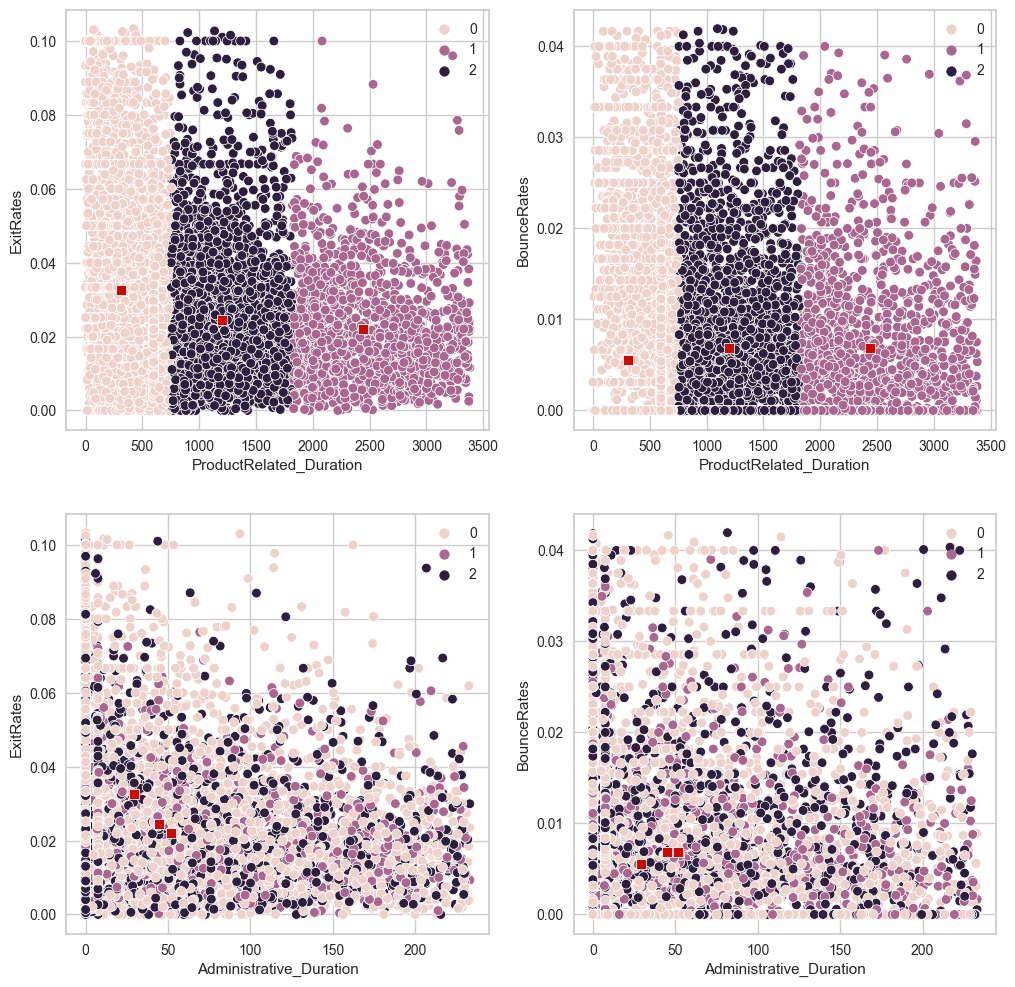

In [29]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(data = clustering_1, x = 'ProductRelated_Duration', y = 'ExitRates', hue = 'cluster')
sns.scatterplot(data = centroids,  x = centroids[:, 3], y = centroids[:, 5],marker = 's', color = 'r')

plt.subplot(2, 2, 2)
sns.scatterplot(data = clustering_1, x = 'ProductRelated_Duration', y = 'BounceRates', hue = 'cluster')
sns.scatterplot(data = centroids,  x = centroids[:, 3], y = centroids[:, 4], marker = 's', color = 'r')

plt.subplot(2, 2, 3)
sns.scatterplot(data = clustering_1, x = 'Administrative_Duration', y = 'ExitRates', hue = 'cluster')
sns.scatterplot(data = centroids,  x = centroids[:, 1], y = centroids[:, 5],marker = 's', color = 'r')

plt.subplot(2, 2, 4)
sns.scatterplot(data = clustering_1, x = 'Administrative_Duration', y = 'BounceRates', hue = 'cluster')
sns.scatterplot(data = centroids,  x = centroids[:, 1], y = centroids[:, 4],marker = 's', color = 'r')

plt.show()


In [30]:
score1 = silhouette_score(data_3, model_kMeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score1)


Silhouetter Score: 0.597


In [31]:
clustering_1.head(2)

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Revenue,cluster
0,0.0,0.0,1.0,0.0,0.003112,0.025156,False,0
1,0.0,0.0,2.0,64.0,0.000000,0.100000,False,0


In [32]:
clustering_1['Region'] = df['Region']
clustering_1['Month'] = df['Month']
clustering_1['Revenue'] = df['Revenue']

Visualization

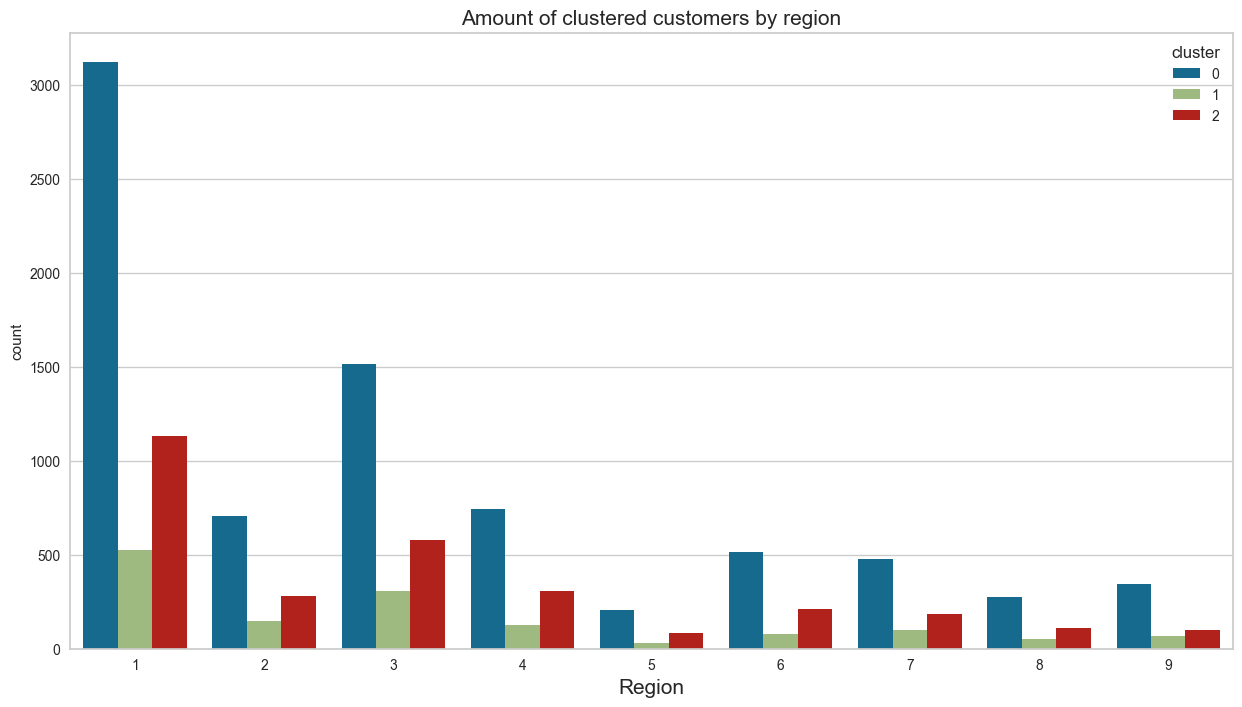

In [33]:
plt.figure(figsize = (15, 8))
pl = sns.countplot(x=clustering_1["Region"],hue = clustering_1['cluster'])
pl.set_title("Amount of clustered customers by region",fontsize=15)
pl.set_xlabel("Region",fontsize=15)
plt.show()


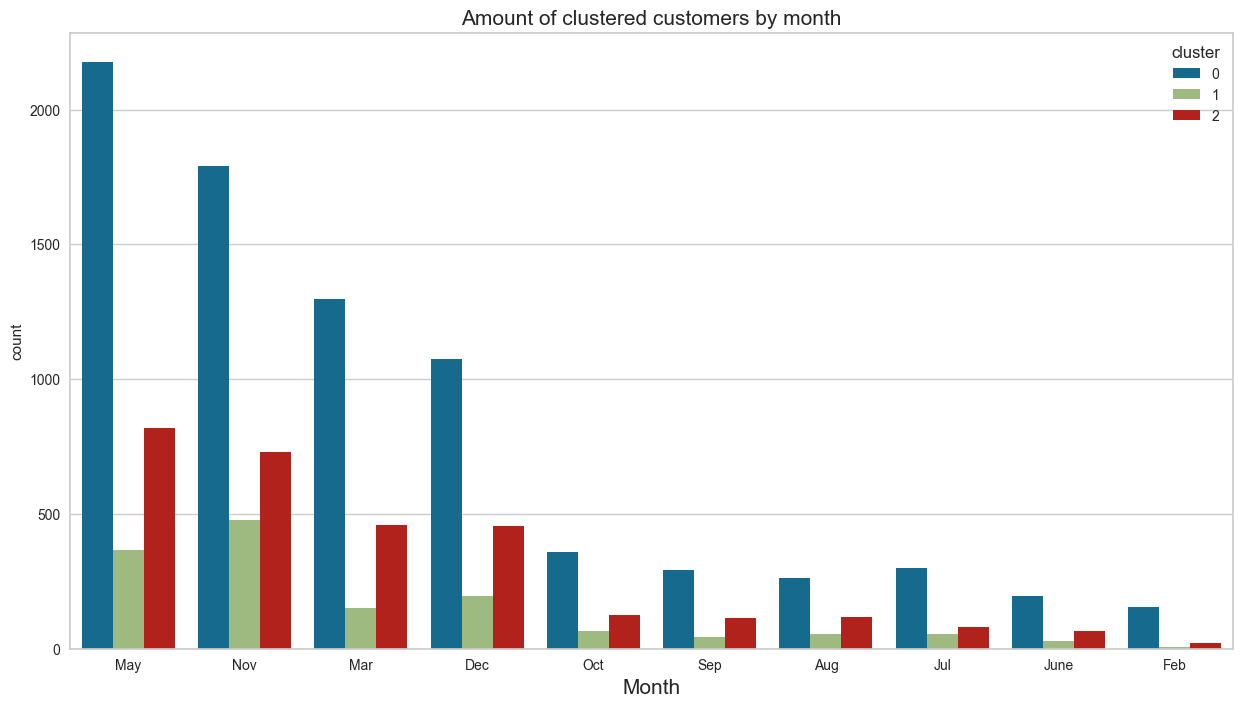

In [34]:
month = clustering_1['Month'].value_counts()
plt.figure(figsize=(15,8))
pl = sns.countplot(x=clustering_1["Month"],hue = clustering_1['cluster'], order = month.index)
pl.set_title("Amount of clustered customers by month",fontsize=15)
pl.set_xlabel("Month",fontsize=15)
plt.show()